To estimate the wight of gold:
At the time $n$, the estimate $\hat{x}_{n,n}$ would be the average of all previous measurements:

$$
\begin{split}
\hat{x}_{n,n} &= \frac{1}{n}(z_1 + z_2 + ... + z_{n-1} + z_n) \\
&= \frac{1}{n} \sum_{i=1}^{n}(z_i)
\end{split}
$$

the dynamic mode in this example is static since the weight of gold doesn't change over time, therefore $\hat{x}_{n+1,n} = \hat{x}_{n,n}$

$$
\begin{split}
\hat{x}_{n,n} &= \frac{1}{n} \sum_{i=1}^{n}(z_i) \\
&=\frac{1}{n} (\sum_{i=1}^{n-1}(z_{i-1}) + z_n) \\
&=\frac{1}{n} \sum_{i=1}^{n-1}(z_{i-1}) + \frac{1}{n} z_n \\
&=\frac{1}{n} \frac{n-1}{n-1} \sum_{i=1}^{n-1}(z_i) + \frac{1}{n}z_n \\
&=\frac{n-1}{n} \frac{1}{n-1} \sum_{i=1}^{n-1}(z_i) + \frac{1}{n}z_n \\
&=\frac{n-1}{n} \hat{x}_{n-1, n-1} + \frac{1}{n}z_n \\
&=\hat{x}_{n-1, n-1} - \frac{1}{n} \hat{x}_{n-1, n-1} + \frac{1}{n}z_n \\
&=\hat{x}_{n-1, n-1} + \frac{1}{n} (z_n - \hat{x}_{n-1, n-1})
\end{split}
$$

Since the dynamic model is this example is static, the predicted state of $x$ equals the estimated state of $x:\hat{x}_{n,n-1} = \hat{x}_{n-1, n-1}$

so, the estimate of the current state can be written as follows:

$$
\hat{x}_{n,n} = \hat{x}_{n, n-1} + \frac{1}{n}(z_i - \hat{x}_{n, n-1})
$$

In [3]:
import random
import matplotlib.pyplot as plt

In [4]:
true_weight = 1000

In [5]:
def measurement(true_weight: float) -> float:
    return true_weight + random.uniform(-20, 20)

In [6]:
class StaticKalman:
    def __init__(self, inital_value: float) -> None:
        self.current_estimate: float = inital_value
        self.predicate_estimate: float = self.current_estimate
        self.times: int = 0

    def update_state_equation(self, meaurement: float) -> float:
        self.times += 1
        kalman_gain: float = 1 / self.times
        self.current_estimate = self.predicate_estimate + kalman_gain * (
            meaurement - self.predicate_estimate
        )
        self.predicate_estimate = self.current_estimate
        return self.current_estimate

In [7]:
k_filter = StaticKalman(1000)

measurements: list[float] = []
estimates: list[float] = []
for i in range(1000):
    the_measurement: float = measurement(true_weight)
    k_filter.update_state_equation(the_measurement)
    measurements.append(the_measurement)
    estimates.append(k_filter.current_estimate)

simple_times = [x for x in range(1000)]
len(simple_times)

1000

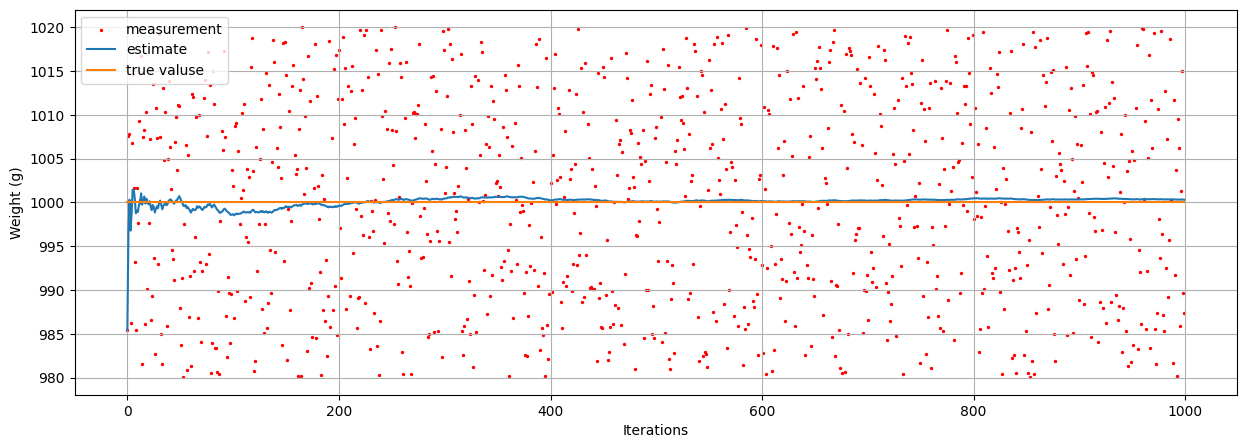

In [8]:
fig = plt.figure()
fig.set_size_inches(15, 5)
ax = fig.add_subplot()
ax.scatter(simple_times, measurements, c="r", s=2, label="measurement")
ax.plot(simple_times, estimates, label="estimate")
ax.plot(simple_times, [true_weight for _ in simple_times], label="true valuse")
ax.set_xlabel("Iterations")
ax.set_ylabel("Weight (g)")

ax.legend()
ax.grid()

plt.show()

## dynamic system

$\alpha$ - $\beta$ *filter*

In [9]:
ALPHA = 0.2
BETA = 0.1

In [10]:
class AlphaBetaFilter:
    def __init__(
        self, guess_position: float, guess_velocity: float, sample_interval: float
    ) -> None:
        self.estimate_position: float = guess_position
        self.estimate_velocity: float = guess_velocity
        self.predicate_position: float = (
            self.estimate_position + sample_interval * self.estimate_velocity
        )
        self.predicate_velocity: float = self.estimate_velocity
        self.sample_interval = sample_interval

    def update_state(self, measurement: float):
        self.estimate_position = self.predicate_position + ALPHA * (
            measurement - self.predicate_position
        )
        self.estimate_velocity = self.predicate_velocity + BETA * (
            (measurement - self.predicate_position) / self.sample_interval
        )
        self.predicate_velocity = self.estimate_velocity
        self.predicate_position = (
            self.estimate_position + self.sample_interval * self.estimate_velocity
        )

        return self.estimate_position, self.estimate_velocity

In [11]:
alpha_beta_filter = AlphaBetaFilter(30000, 40, 5)

alpha_beta_example_data: list[float] = [
    30171,
    30353,
    30756,
    30799,
    31018,
    31278,
    31276,
    31379,
    31748,
    32175,
]

alpha_beta_example_sample_times = [x for x in range(10)]

alpha_beta_example_estimate_position: list[float] = []
alpha_beta_example_estimate_velocity: list[float] = []
alpha_beta_example_predicate_position: list[float] = []
alpha_beta_example_predicate_velocity: list[float] = []

for i in alpha_beta_example_data:
    alpha_beta_filter.update_state(i)
    alpha_beta_example_estimate_position.append(alpha_beta_filter.estimate_position)
    alpha_beta_example_predicate_position.append(alpha_beta_filter.predicate_position)
    alpha_beta_example_estimate_velocity.append(alpha_beta_filter.estimate_velocity)
    alpha_beta_example_predicate_velocity.append(alpha_beta_filter.predicate_velocity)

In [12]:
true_position = [30200 + 200 * x for x in range(10)]
true_position

[30200, 30400, 30600, 30800, 31000, 31200, 31400, 31600, 31800, 32000]

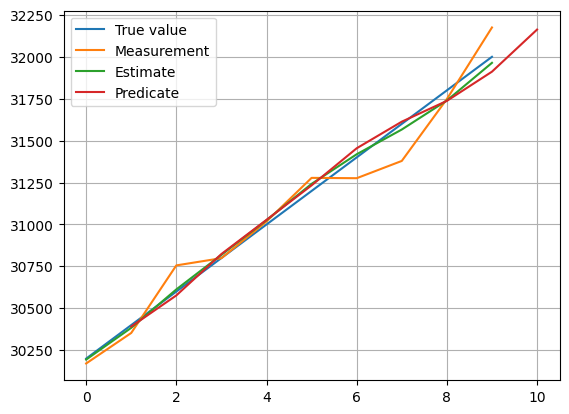

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(alpha_beta_example_sample_times, true_position, label="True value")
ax.plot(alpha_beta_example_sample_times, alpha_beta_example_data, label="Measurement")
ax.plot(
    alpha_beta_example_sample_times,
    alpha_beta_example_estimate_position,
    label="Estimate",
)
ax.plot(
    [x + 1 for x in alpha_beta_example_sample_times],
    alpha_beta_example_predicate_position,
    label="Predicate",
)

ax.legend()
ax.grid()

plt.show()

## α-β-γ filter

In [14]:
class GHKFilter:
    def __init__(self, interval: float, position: float, velocity: float, accleration: float) -> None:
        self.ALPHA = 0.5
        self.BETA = 0.4
        self.GAMA = 0.1
        self.INTERVAL = interval
        self.estimate_range = position
        self.estimate_velocity = velocity
        self.estimate_accleration = accleration
        self.predicated_range = self.__predicate_range(self.estimate_range, self.estimate_velocity, self.estimate_accleration)
        self.predicated_velocity = self.__predicate_velocity(self.estimate_velocity, self.estimate_accleration)
        self.predicated_accleration = self.__predicate_accleration(self.estimate_accleration)
        print(f"x0,0: {self.estimate_range}, xs0,0: {self.estimate_velocity}, xa0,0: {self.estimate_accleration}")
        print(f"x1,0: {self.predicated_range}, xs1,0: {self.predicated_velocity}, xa1,0: {self.predicated_accleration}")

    def update(self, measurement):
        self.estimate_range:float = self.predicated_range + self.ALPHA * (measurement - self.predicated_range)
        self.estimate_velocity: float = self.predicated_velocity + self.BETA * ((measurement - self.predicated_range) / self.INTERVAL)
        self.estimate_accleration:float = self.predicated_accleration + self.GAMA * ((measurement - self.predicated_range) / (0.5 * (self.INTERVAL ** 2)))

        self.predicated_range = self.__predicate_range(self.estimate_range, self.estimate_velocity, self.estimate_accleration)
        self.predicated_velocity = self.__predicate_velocity(self.estimate_velocity, self.estimate_accleration)
        self.predicated_accleration = self.__predicate_accleration(self.estimate_accleration)

        return self.estimate_range, self.estimate_velocity, self.estimate_accleration

    def __predicate_range(self, esti_range, velocity, accleration) -> float:
        return esti_range + (self.INTERVAL * velocity) + (0.5 * accleration * (self.INTERVAL ** 2))
    
    def __predicate_velocity(self, velocity, accleration) -> float:
        return velocity + (accleration * self.INTERVAL)

    def __predicate_accleration(self, accleration) -> float:
        return accleration

In [ ]:
ghk_filter = GHKFilter(5, 30000, 50, 0)

ghk_data = [30453, 30453, 30906, 30999, 31368, 31978, 32526, 33379, 34698, 36275]

ghk_estimate_range: list[float] = []
ghk_estimate_velocity: list[float] = []
ghk_estimate_accleration: list[float] = []
ghk_predicated_range: list[float] =[]
ghk_predicated_velocity: list[float] =[]
ghk_predicated_accleration: list[float] =[]
ghk_times = [x for x in range(10)]
ghk_true_velocity = [50 if x < 3 else 50 + (x - 2) * 8 * 5 for x in range(10)]
ghk_true_accleration = [ 0 if x < 3 else 8 for x in range(10)]
print(ghk_true_velocity)

for i in ghk_data:
    ghk_filter.update(i)
    ghk_estimate_range.append(ghk_filter.estimate_range)
    ghk_estimate_velocity.append(ghk_filter.estimate_velocity)
    ghk_estimate_accleration.append(ghk_filter.estimate_accleration)
    ghk_predicated_range.append(ghk_filter.predicated_range)
    ghk_predicated_velocity.append(ghk_filter.predicated_velocity)
    ghk_predicated_accleration.append(ghk_filter.predicated_accleration)

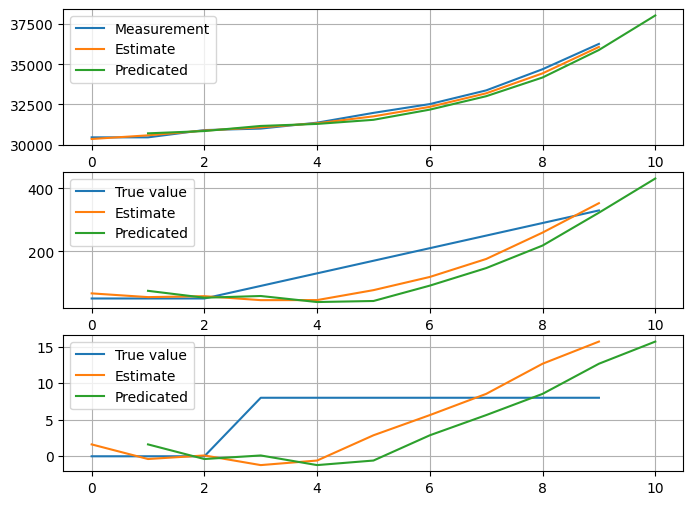

In [34]:
fig = plt.figure()
fig.set_size_inches(8, 6)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(ghk_times, ghk_data, label="Measurement")
ax1.plot(ghk_times, ghk_estimate_range, label="Estimate")
ax1.plot([x + 1 for x in ghk_times], ghk_predicated_range, label="Predicated")

ax1.legend()
ax1.grid()

ax2.plot(ghk_times, ghk_true_velocity, label="True value")
ax2.plot(ghk_times, ghk_estimate_velocity, label="Estimate")
ax2.plot([x + 1 for x in ghk_times], ghk_predicated_velocity, label="Predicated")

ax2.legend()
ax2.grid()

ax3.plot(ghk_times, ghk_true_accleration, label="True value")
ax3.plot(ghk_times, ghk_estimate_accleration, label="Estimate")
ax3.plot([x + 1 for x in ghk_times], ghk_predicated_accleration, label="Predicated")

ax3.legend()
ax3.grid()

plt.show()